In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df_train = pd.read_csv('/home/han/Desktop/Han_ws/00.Data/07.ML/data/mnist_train.csv')
df_test = pd.read_csv('/home/han/Desktop/Han_ws/00.Data/07.ML/data/mnist_test.csv')
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [7]:
x_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])
x_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [8]:
import random

samples = random.choices(population=range(0,60000), k=16)
samples

[59332,
 57907,
 35834,
 57748,
 2762,
 59921,
 14860,
 33241,
 38569,
 44251,
 1173,
 59374,
 54911,
 44029,
 52279,
 6037]

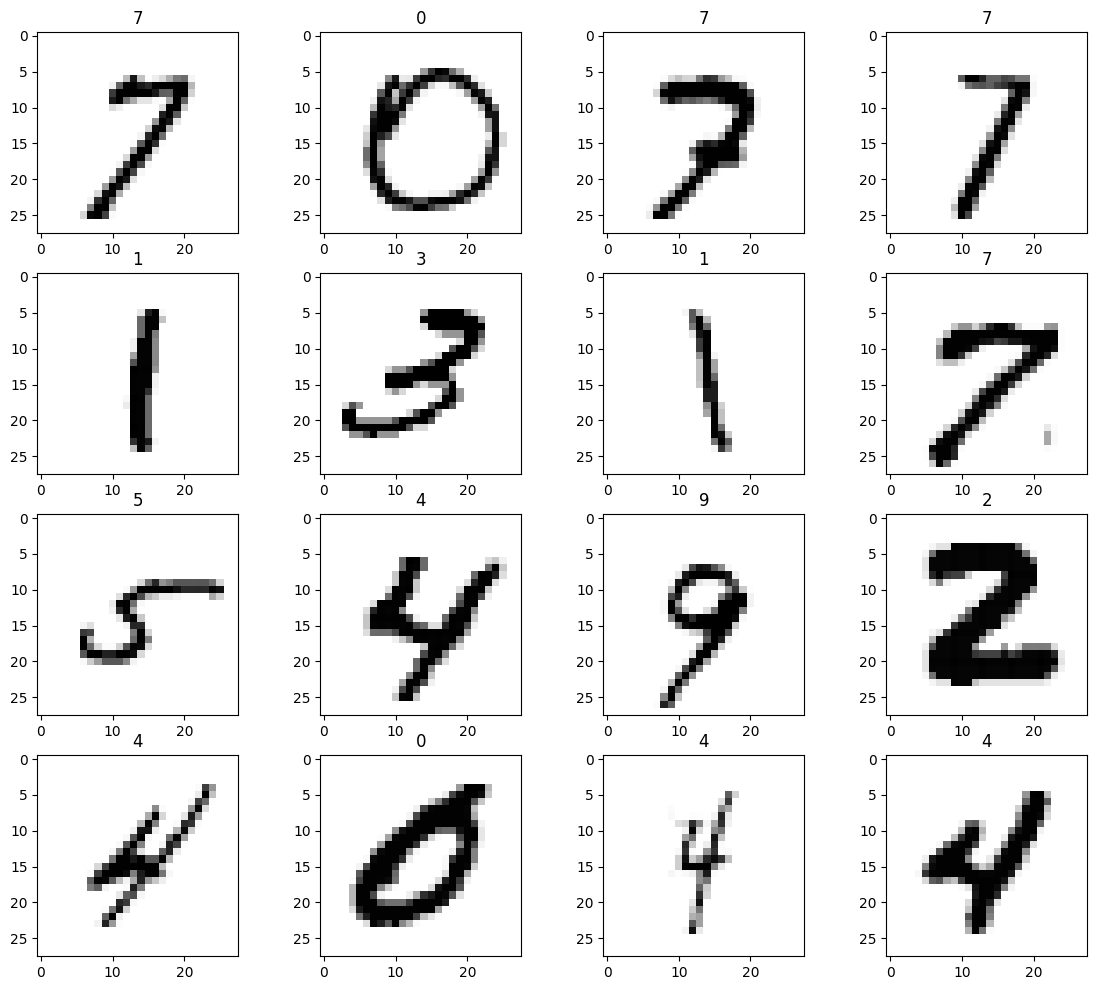

In [9]:
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples) :
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.18253636360168457


In [13]:
start_time = time.time()
pred = clf.predict(x_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  40.45188546180725
0.9688


In [17]:
pipe = Pipeline([('pca', PCA()), ('clf', KNeighborsClassifier())])
parameters = {'pca__n_components' : [2, 5, 10], 'clf__n_neighbors' : [5, 10, 15]}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [18]:
print("Best score: %0.3f" %grid.best_score_)
print("Best parameters set : ")
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()) :
    print("\t%s : %r " %(param_name, best_parameters[param_name]))

Best score: 0.931
Best parameters set : 
	clf__n_neighbors : 10 
	pca__n_components : 10 


In [19]:
accuracy_score(y_test, grid.best_estimator_.predict(x_test))

0.9288

In [21]:
def result(y_pred, y_test) :
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

result(grid.predict(x_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



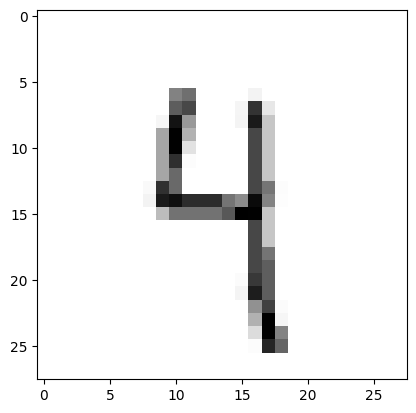

Answer is :  [4]
Real Label is :  4


In [24]:
n = 4893
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

print('Answer is : ', grid.best_estimator_.predict(x_test[n].reshape(1, 784)))
print('Real Label is : ', y_test[n])

In [25]:
preds = grid.best_estimator_.predict(x_test)


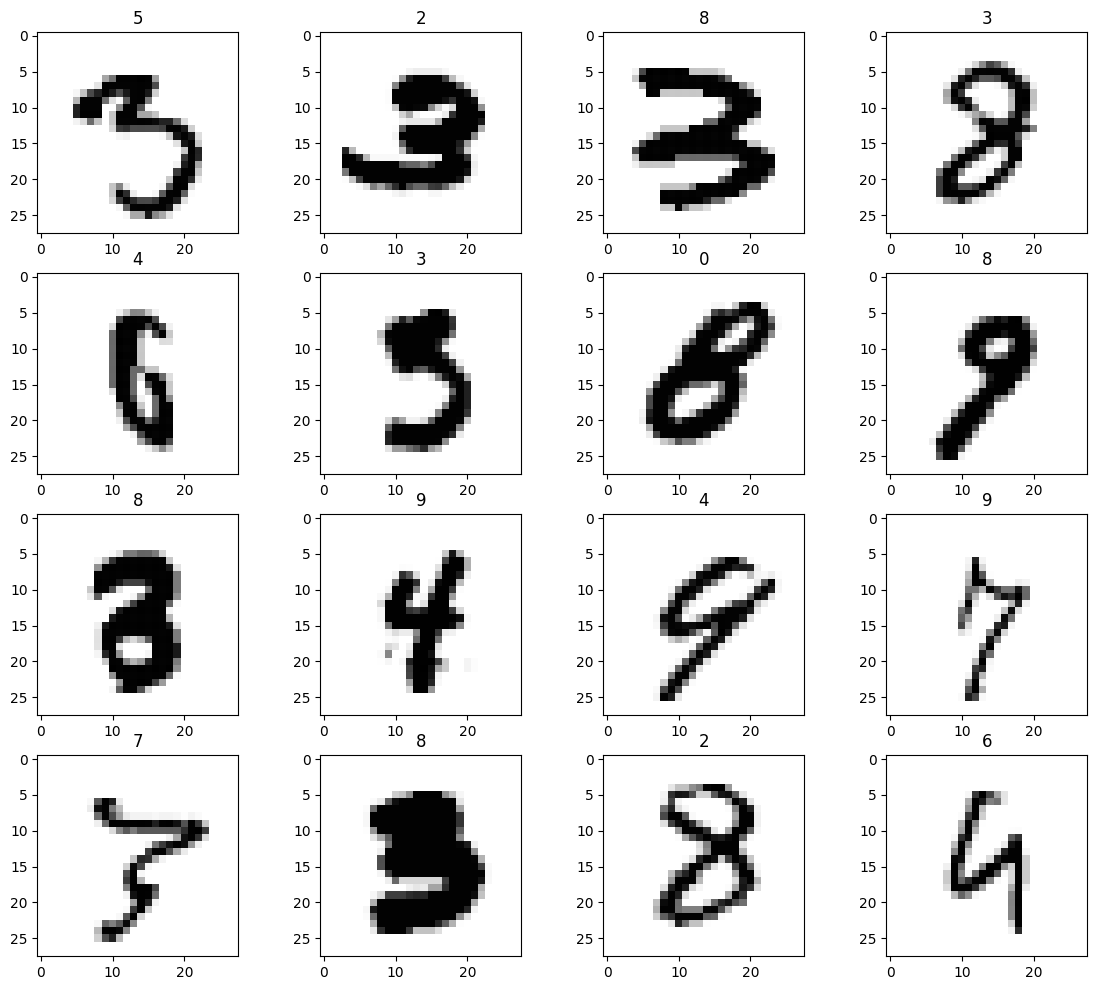

In [27]:
wrong_results = x_test[y_test != preds]
samples = random.choices(population=range(0, wrong_results.shape[0]), k=16)
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples) :
    plt.subplot(4, 4, idx+1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title(grid.best_estimator_.predict(wrong_results[n].reshape(1,784))[0])

plt.show()